# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
df_holiday=pd.read_csv(r"C:\Users\sruth\Downloads\Holiday_Package.csv")

In [3]:
df_holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df_holiday = df_holiday.drop('Unnamed: 0', axis=1)

In [5]:
df_holiday.shape

(872, 7)

In [6]:
df_holiday.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


In [7]:
df_holiday.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [8]:
df_holiday.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [9]:
df_holiday.duplicated().sum()

0

In [10]:
for i in df_holiday.columns:
    if df_holiday[i].dtype=='object':
        print(i)
        print(df_holiday[i].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [11]:
df_holiday[df_holiday['Salary']>=155000]

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
62,no,165895,61,13,0,0,no
108,no,216630,58,12,0,0,no
162,no,162024,56,12,0,0,no
476,no,208561,35,16,1,2,no
623,no,236961,39,12,0,4,no
625,no,215675,42,12,0,3,no


In [12]:
# Univariate analysis for Numerical features:

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

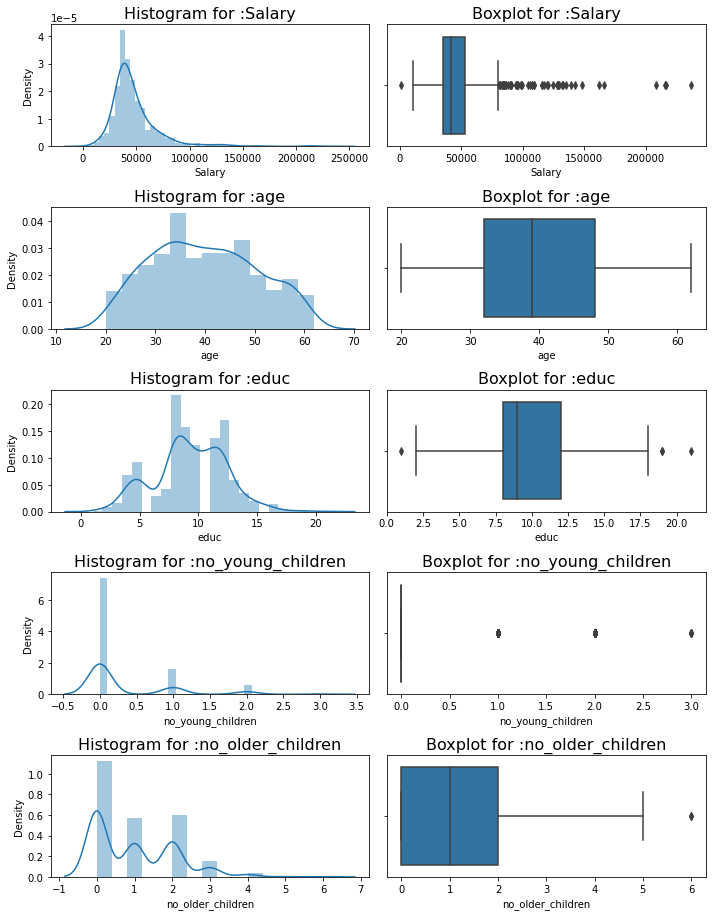

In [13]:
a=1
plt.figure(figsize=(10,20))
for i in df_holiday.columns :
    if df_holiday[i].dtypes != 'object':
        plt.subplot(8,2,a)
        sns.distplot(df_holiday[i])
        plt.title("Histogram for :" +i,fontsize = 16)
        plt.subplot(8,2,a+1)
        sns.boxplot(df_holiday[i])
        plt.title("Boxplot for :" +i,fontsize = 16)
        a+=2
plt.tight_layout()


In [14]:
# check the outliers % in each columns:

Q1 = df_holiday.quantile(0.25)
Q3 = df_holiday.quantile(0.75)
IQR= Q3-Q1
(((df_holiday<(Q1-1.5*IQR)) | (df_holiday>(Q3+1.5*IQR))).sum()/df_holiday.shape[0]*100).round(2)

C:\Users\sruth\AppData\Local\Temp\ipykernel_25168\2194785278.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (((df_holiday<(Q1-1.5*IQR)) | (df_holiday>(Q3+1.5*IQR))).sum()/df_holiday.shape[0]*100).round(2)


Holliday_Package      0.00
Salary                6.54
age                   0.00
educ                  0.46
foreign               0.00
no_older_children     0.23
no_young_children    23.74
dtype: float64

In [15]:
df_holiday.skew()

C:\Users\sruth\AppData\Local\Temp\ipykernel_25168\2034300742.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_holiday.skew()


Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [16]:
#Treat the outliers:
def remove_outliers(col):
    sorted(col)
    Q1, Q3=np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5*IQR)
    upper_Range = Q3+(1.5*IQR)
    return lower_range, upper_Range
num = df_holiday.dtypes[df_holiday.dtypes!='object'].index
num

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children'], dtype='object')

In [17]:
num1 = ['Salary', 'age', 'educ', 'no_older_children']

In [18]:
for column in df_holiday[num1].columns:
    lr, ur = remove_outliers(df_holiday[column])
    df_holiday[column] = np.where(df_holiday[column]>ur, ur, df_holiday[column])
    df_holiday[column] = np.where(df_holiday[column]<lr, lr, df_holiday[column])

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

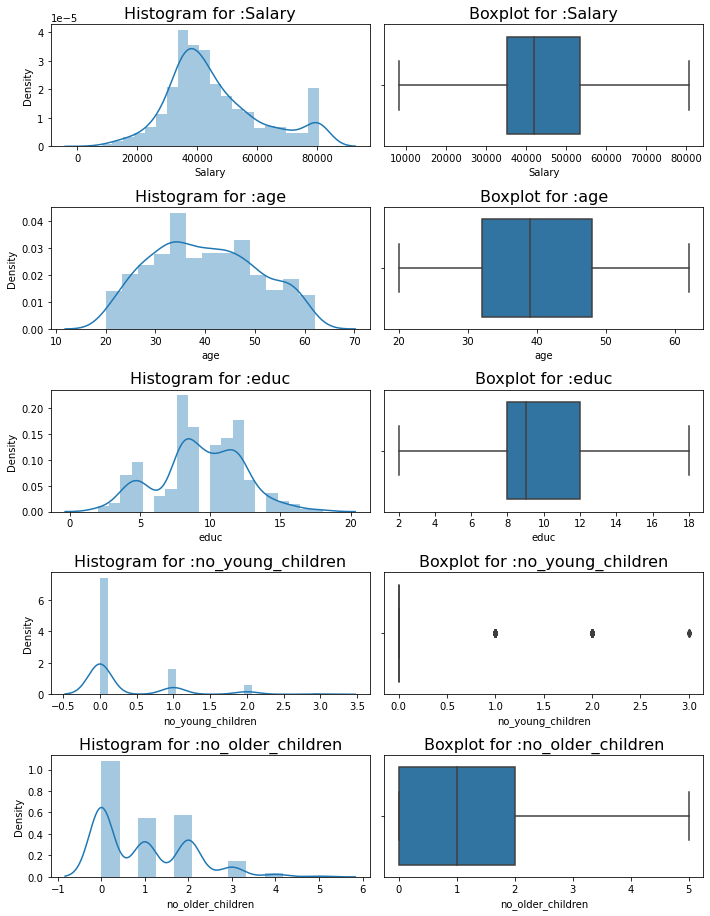

In [19]:
a=1
plt.figure(figsize=(10,20))
for i in df_holiday.columns :
    if df_holiday[i].dtypes != 'object':
        plt.subplot(8,2,a)
        sns.distplot(df_holiday[i])
        plt.title("Histogram for :" +i,fontsize = 16)
        plt.subplot(8,2,a+1)
        sns.boxplot(df_holiday[i])
        plt.title("Boxplot for :" +i,fontsize = 16)
        a+=2
plt.tight_layout()

In [20]:
df_holiday.skew()

C:\Users\sruth\AppData\Local\Temp\ipykernel_25168\2034300742.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_holiday.skew()


Salary               0.710966
age                  0.146412
educ                -0.095087
no_young_children    1.946515
no_older_children    0.872881
dtype: float64

In [21]:
df_holiday['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

<Figure size 2160x2160 with 0 Axes>

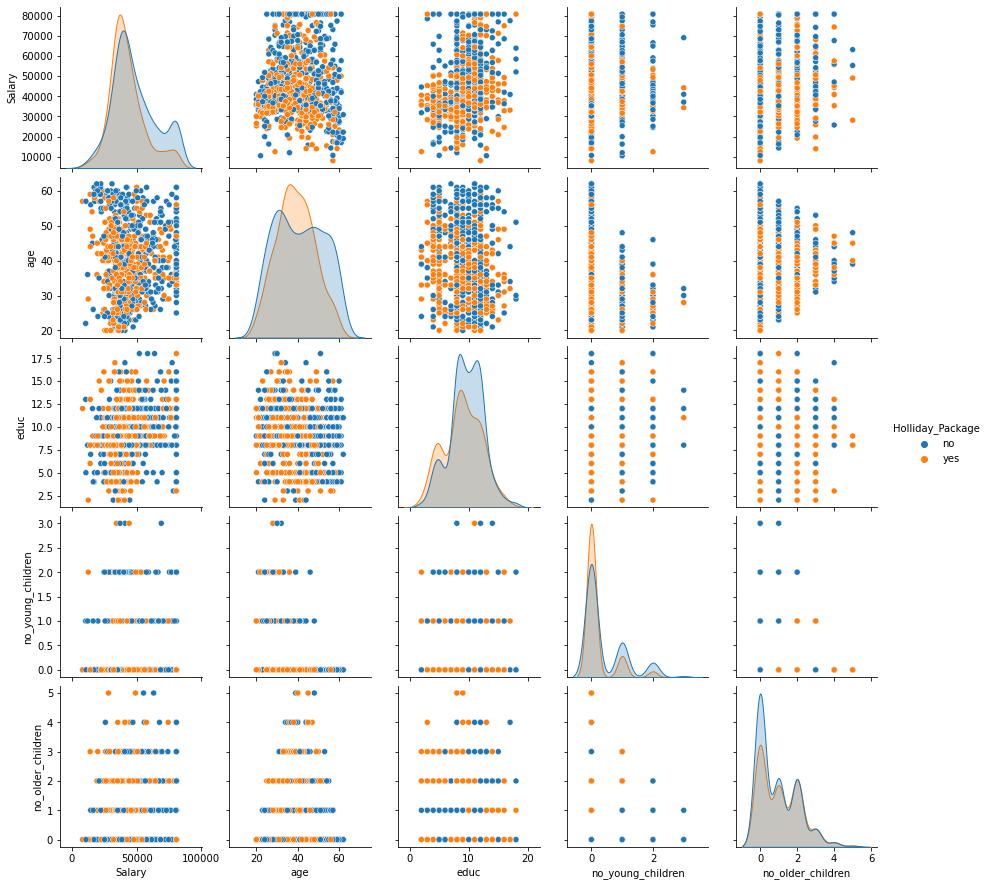

In [22]:
#Multivariate analysis:
plt.figure(figsize=(30,30))
sns.pairplot(df_holiday, hue='Holliday_Package')
plt.show();

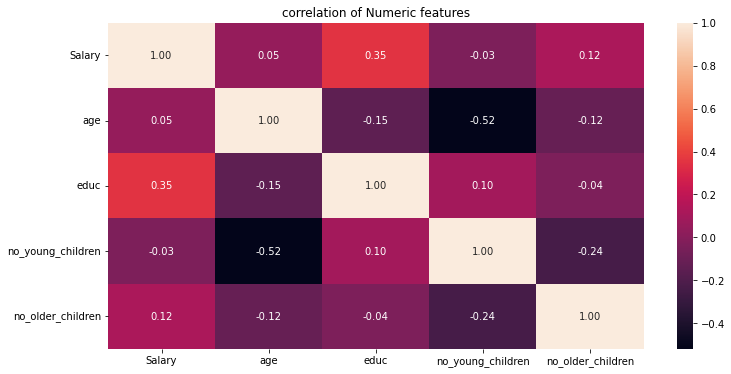

In [23]:
# Heat map:

plt.figure(figsize=(12,6))
sns.heatmap(df_holiday.corr(), annot=True, fmt='.2f' )
plt.title('correlation of Numeric features')
plt.show()

univariate & Bivariate analysis for Categorical variable with Target variable:

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


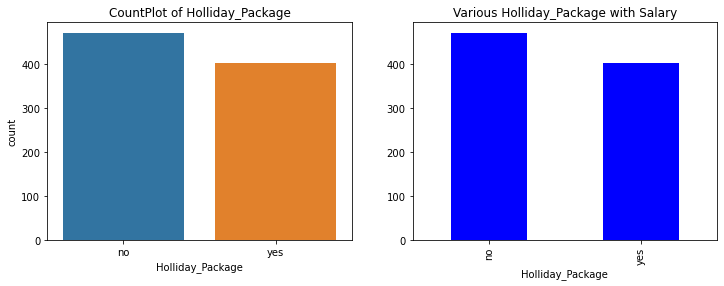

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(df_holiday['Holliday_Package'])
plt.title("CountPlot of Holliday_Package")

plt.subplot(1,2,2)
pd.crosstab(df_holiday['Salary'],df_holiday['Holliday_Package']).sum().plot(kind='bar', color='blue')
plt.title("Various Holliday_Package with Salary");

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


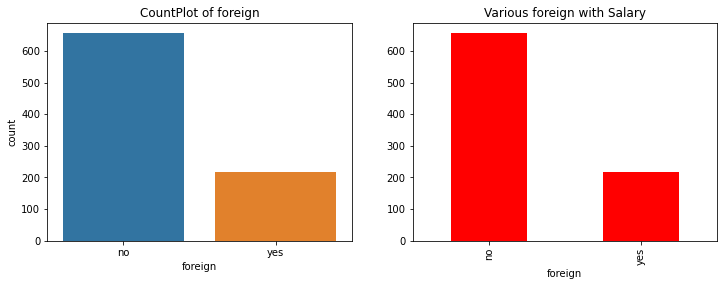

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(df_holiday['foreign'])
plt.title("CountPlot of foreign")
plt.subplot(1,2,2)
pd.crosstab(df_holiday['Salary'],df_holiday['foreign']).sum().plot(kind='bar', color='red')
plt.title("Various foreign with Salary");

In [26]:
df_holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,1,1.0,no
1,yes,37207.0,45.0,8.0,0,1.0,no
2,no,58022.0,46.0,9.0,0,0.0,no
3,no,66503.0,31.0,11.0,2,0.0,no
4,no,66734.0,44.0,12.0,0,2.0,no


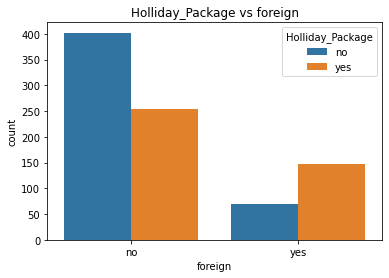

In [27]:
sns.countplot(x='foreign', hue='Holliday_Package',data=df_holiday)
plt.title('Holliday_Package vs foreign')

plt.show()

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

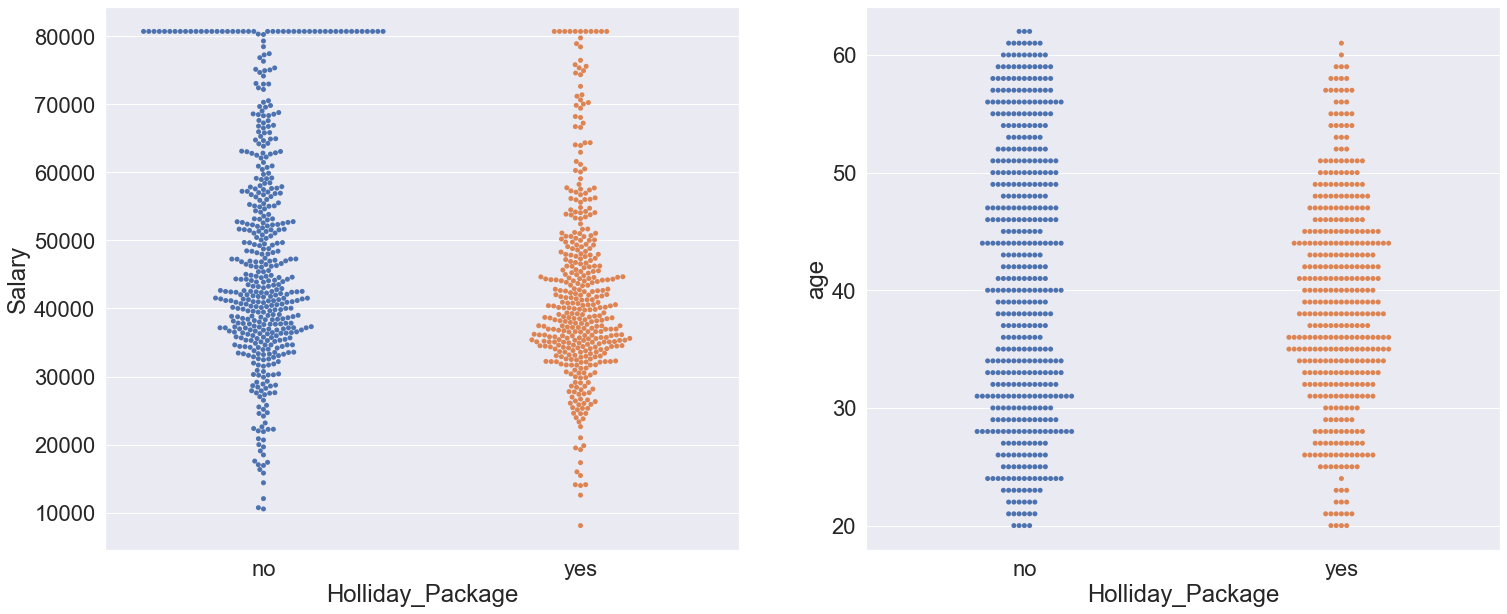

In [36]:
plt.figure(figsize=(25,10))
sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.swarmplot(data=df_holiday,x='Holliday_Package', y='Salary')
plt.subplot(1,2,2)
sns.swarmplot(data=df_holiday,x='Holliday_Package', y='age')

<AxesSubplot:xlabel='foreign', ylabel='count'>

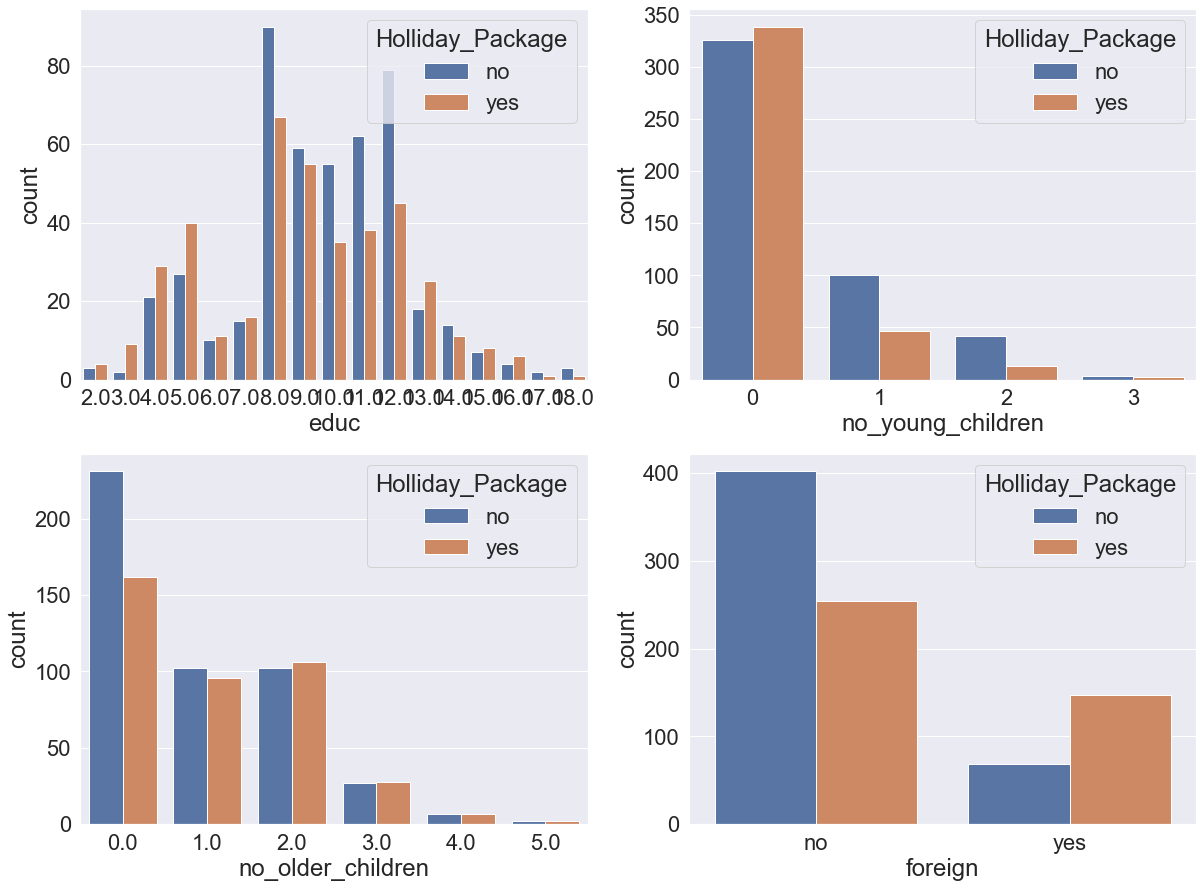

In [40]:
### Count plot
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(data=df_holiday,hue='Holliday_Package', x='educ')
plt.subplot(2,2,2)
sns.countplot(data=df_holiday,hue='Holliday_Package', x='no_young_children')
plt.subplot(2,2,3)
sns.countplot(data=df_holiday,hue='Holliday_Package', x='no_older_children')
plt.subplot(2,2,4)
sns.countplot(data=df_holiday,hue='Holliday_Package', x='foreign')

In [41]:
pd.crosstab(df_holiday['no_young_children'],df_holiday['Holliday_Package'],margins=True)

Holliday_Package,no,yes,All
no_young_children,,,
0,326,339,665
1,100,47,147
2,42,13,55
3,3,2,5
All,471,401,872


In [42]:
pd.crosstab(df_holiday['foreign'],df_holiday['Holliday_Package'],margins=True)

Holliday_Package,no,yes,All
foreign,,,
no,402,254,656
yes,69,147,216
All,471,401,872


In [43]:
Cor=df_holiday.corr().round(2)
Cor

,Salary,age,educ,no_young_children,no_older_children
Salary,1.00,0.05,0.35,-0.03,0.12
age,0.05,1.00,-0.15,-0.52,-0.12
educ,0.35,-0.15,1.00,0.10,-0.04
no_young_children,-0.03,-0.52,0.10,1.00,-0.24
no_older_children,0.12,-0.12,-0.04,-0.24,1.00


In [ ]:
# VIF Checking for Multicollinearity

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [47]:
df_holiday.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [54]:
X = df_holiday[['Salary','age','educ','no_young_children','no_older_children']]
checkvif(X)

           Variables        VIF
0             Salary  10.926658
1                age   7.873398
2               educ   9.986233
3  no_young_children   1.428240
4  no_older_children   1.881915


In [55]:
df_holiday.replace(['yes','no'],[1,0],inplace=True)
#df_holiday .Foreign.replace(['yes','no'],[1,0],inplace=True)

In [56]:
df_holiday.Holliday_Package.value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [57]:
df_holiday.Holliday_Package.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

In [58]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int64  
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 47.8 KB
